In [1]:
import json
from datetime import datetime


import pandas as pd
import numpy as np

# ufo_3000.json

## Importing json file

In [2]:
with open("ufo_3000.json") as f:
    data = json.load(f)

## Converting datetime

In [3]:
def convertingDatetime():
    convertion_errors = []
    for i, record in enumerate(data):
        #datetime_object = datetime.strptime(record["datetime"], "%d/%m/%Y %H:%M")
        if "24:00" in data[i]["datetime"]:
            data[i]["datetime"] = data[i]["datetime"].replace("24:00", "00:00")
        
        try:
            datetime_object = datetime.strptime(record["datetime"], "%d/%m/%Y %H:%M")
            record["year"] = datetime_object.year
        except:
            try:
                datetime_object = datetime.strptime(record["datetime"], "%m/%d/%Y %H:%M")
                record["year"] = datetime_object.year
            except:
                convertion_errors.append(i)
    return convertion_errors

## Dealing with errors

In [4]:
convertion_errors = convertingDatetime()
len(convertion_errors)

0

In [5]:
for i in convertion_errors:
    print("ID :",i)
    print(data[i]["datetime"])
    print()

## Creating new json file

In [6]:
with open("ufo_3000_preprocessed.json", "w") as f:
    json.dump(data, f, indent=4)

# Creating freq_by_year file

In [7]:
list_of_years = [elem["year"] for elem in data]
min_year = min(list_of_years)
max_year = max(list_of_years)

freq_by_year = {}
for y in range(min_year,max_year+1):
    freq_by_year[y] = 0
    
for y in list_of_years:
    freq_by_year[y] += 1

In [14]:
liste_freq_by_year = np.empty((len(freq_by_year), 2), int)
for k in range(0,len(freq_by_year)):
    liste_freq_by_year[k,0] = min_year+k
    liste_freq_by_year[k,1] = freq_by_year[min_year+k]

DF_freq_by_year = pd.DataFrame(liste_freq_by_year, columns={"year", "freq"})
DF_freq_by_year.to_csv("ufo_3000_freq_by_year_youri.csv")

In [9]:
with open("ufo_3000_freq_by_year.json", "w") as f:
    json.dump(freq_by_year, f, sort_keys=True, indent=4)

# Creating freq_by_country file

In [4]:
freq_by_country = {}
for y in ['us', 'gb', 'ca', 'au', 'de', 'other']:
    freq_by_country[y] = 0
    
for elem in data:
    if elem["country"] != "":
        freq_by_country[elem["country"]] += 1
    else:
        freq_by_country['other'] += 1

In [5]:
with open("ufo_3000_freq_by_country.json", "w") as f:
    json.dump(freq_by_country, f, sort_keys=True, indent=4)

['us', 'gb', 'ca', 'au', 'de', 'other']
[2499, 60, 87, 12, 1, 341]


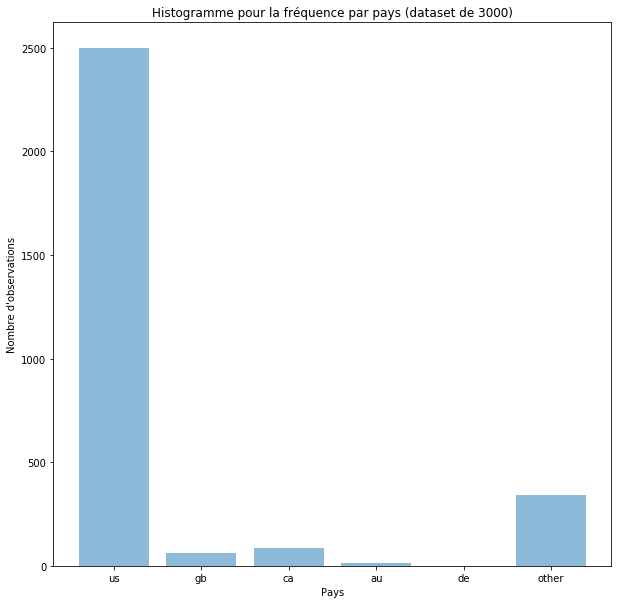

In [6]:
# https://pythonspot.com/matplotlib-bar-chart/

import numpy as np
import matplotlib.pyplot as plt

print(list(freq_by_country.keys()))
print(list(freq_by_country.values()))
 
objects = list(freq_by_country.keys())
y_pos = np.arange(len(objects))
valueurs = list(freq_by_country.values())

plt.figure(figsize=(10,10))
plt.bar(y_pos, valueurs, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Nombre d\'observations')
plt.xlabel('Pays')
plt.title('Histogramme pour la fréquence par pays (dataset de 3000)')
plt.savefig('Figures/freq_par_pays_3000.jpg', quality=100)

# Creating fred_by_us_state file

In [28]:
with open("us_states.json") as f:
    us_states = json.load(f)

In [29]:
freq_by_state = {}
for s in us_states.values():
    freq_by_state[s] = 0

for elem in [e for e in data if e["country"] == "us"]:
    try:
        freq_by_state[us_states[elem["state"].upper()]] += 1
    except:
        print(elem,"not in us_states_dict")

In [39]:
with open("us_states_geo.json") as f:
    us_states_geo = json.load(f)

In [40]:
for i, elem in enumerate(us_states_geo["features"]):
    us_states_geo["features"][i]["properties"]["frequency"] = freq_by_state[elem["properties"]["name"]]

In [43]:
with open("ufo_3000_freq_by_us_state.json", "w") as f:
    json.dump(us_states_geo, f, sort_keys=False, indent=4)

In [31]:
freq_by_state

{'Alabama': 29,
 'Alaska': 10,
 'American Samoa': 0,
 'Arizona': 90,
 'Arkansas': 29,
 'California': 289,
 'Colorado': 73,
 'Connecticut': 39,
 'Delaware': 2,
 'District of Columbia': 0,
 'Federated States Of Micronesia': 0,
 'Florida': 133,
 'Georgia': 42,
 'Guam': 0,
 'Hawaii': 9,
 'Idaho': 20,
 'Illinois': 96,
 'Indiana': 61,
 'Iowa': 24,
 'Kansas': 21,
 'Kentucky': 32,
 'Louisiana': 17,
 'Maine': 20,
 'Marshall Islands': 0,
 'Maryland': 30,
 'Massachusetts': 40,
 'Michigan': 61,
 'Minnesota': 39,
 'Mississippi': 18,
 'Missouri': 57,
 'Montana': 18,
 'Nebraska': 15,
 'Nevada': 36,
 'New Hampshire': 22,
 'New Jersey': 35,
 'New Mexico': 36,
 'New York': 127,
 'North Carolina': 76,
 'North Dakota': 2,
 'Northern Mariana Islands': 0,
 'Ohio': 86,
 'Oklahoma': 35,
 'Oregon': 64,
 'Palau': 0,
 'Pennsylvania': 89,
 'Puerto Rico': 1,
 'Rhode Island': 8,
 'South Carolina': 41,
 'South Dakota': 5,
 'Tennessee': 65,
 'Texas': 169,
 'Utah': 33,
 'Vermont': 8,
 'Virgin Islands': 0,
 'Virginia':

In [32]:
with open("us_states_geo.json") as f:
    us_states_geo = json.load(f)

In [33]:
list_states_geo = set([e["properties"]["name"] for e in us_states_geo["features"]])
list_states_dict = set(us_states.values())

print("dict not in geo")
for e in list_states_dict:
    if e not in list_states_geo:
        print(e)
    
print()
print("geo not in dict")
for e in list_states_geo:
    if e not in list_states_dict:
        print(e)

dict not in geo
Guam
Federated States Of Micronesia
American Samoa
Palau
Northern Mariana Islands
Marshall Islands
Virgin Islands

geo not in dict


In [ ]:
us_states_geo